# 0.0 Imports

In [1]:
import pandas      as pd
import numpy       as np
import xgboost     as xgb
import seaborn     as sns
import warnings

from IPython.display import HTML

from matplotlib              import pyplot          as plt
from sklearn                 import model_selection as ms
from sklearn                 import ensemble        as en

from sklearn.metrics         import precision_recall_curve, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV


from sklearn.linear_model    import LogisticRegression as lr

from yellowbrick.classifier import ConfusionMatrix, class_prediction_error, ClassificationReport

warnings.filterwarnings("ignore")

# 0.2 Load Dataset

In [2]:
train = pd.read_csv('classification_train.csv')
test = pd.read_csv('classification_test.csv')

In [3]:
train.head()

,x1,x2,target
0,1.934224,-0.111822,1
1,1.767383,-0.976402,1
2,0.937101,-0.085633,1
3,1.340732,0.166960,1
4,-0.199901,-0.155204,1


In [4]:
test.head()

,x1,x2,target
0,1.114204,-0.434321,1
1,-1.238490,0.521390,0
2,-0.091781,-0.169471,1
3,0.298820,0.076368,0
4,-0.265779,0.479812,1


# 1.0 Data Description

In [5]:
print('Number of Columns: {}'.format(train.shape[1]))
print('Number of Rows: {}'.format(train.shape[0]))

Number of Columns: 3
Number of Rows: 670


In [6]:
train.dtypes

x1        float64
x2        float64
target      int64
dtype: object

In [7]:
train['target'].value_counts()

1    339
0    331
Name: target, dtype: int64

# 2.0 Machine Learning Modelling

## 2.1 Logistic Regression

In [36]:
#model definition

lgr = lr()

### 2.1.1 Drop 'x1' Column

In [37]:
#Data preparation
X = train.drop(['target', 'x1'], axis=1)
y = train['target'].copy()


#cross valditation precision
precision_mean_score = cross_val_score(lgr, X, y, scoring="precision", cv = 5).mean()
print('Mean precision score: {}'.format(precision_mean_score))

#cross validation reccall
recall_mean_score = cross_val_score(lgr, X, y, scoring="recall", cv = 5).mean()
print('Mean recall score: {}'.format(recall_mean_score))

#cross validation f1-score
f1_mean_score = cross_val_score(lgr, X, y, scoring="f1", cv = 5).mean()
print('Mean f1 score: {}'.format(f1_mean_score))

Mean precision score: 0.7894122030332251
Mean recall score: 0.7877085162423179
Mean f1 score: 0.7877066526944645


### 2.1.2 Drop 'x2' Column

In [38]:
X = train.drop(['target', 'x2'], axis=1)
y = train['target'].copy()


#cross validation precision
precision_mean_score = cross_val_score(lgr, X, y, scoring="precision", cv = 5).mean()
print('Mean precision score: {}'.format(precision_mean_score))

#cross validation reccall
recall_mean_score = cross_val_score(lgr, X, y, scoring="recall", cv = 5).mean()
print('Mean recall score: {}'.format(recall_mean_score))

#cross validation f1
f1_mean_score = cross_val_score(lgr, X, y, scoring="f1", cv = 5).mean()
print('Mean f1 score: {}'.format(f1_mean_score))

Mean precision score: 0.6828359948177677
Mean recall score: 0.6875768217734854
Mean f1 score: 0.6834808114607874


### 2.1.3 Full Columns

In [11]:
#Data preparation
X = train.drop(['target'], axis=1)
y = train['target'].copy()

#cross validation precision
precision_mean_score = cross_val_score(lgr, X, y, scoring="precision", cv = 5).mean()
print('Mean precision score: {}'.format(precision_mean_score))

#cross validation reccall
recall_mean_score = cross_val_score(lgr, X, y, scoring="recall", cv = 5).mean()
print('Mean recall score: {}'.format(recall_mean_score))

#cross validation f1
f1_mean_score = cross_val_score(lgr, X, y, scoring="f1", cv = 5).mean()
print('Mean f1 score: {}'.format(f1_mean_score))

Mean precision score: 0.8451737769934511
Mean recall score: 0.8377963125548729
Mean f1 score: 0.8413796793971489


## 2.2 Random Forest

In [12]:
# model definition
rf = en.RandomForestClassifier( n_jobs=-1, random_state=42 ) 

### 2.2.1 Drop 'x1' Column

In [13]:
#Data Preparation
X = train.drop(['target', 'x1'], axis=1)
y = train['target'].copy()


#cross validation precision
precision_mean_score = cross_val_score(rf, X, y, scoring="precision", cv = 5).mean()
print('Mean precision score: {}'.format(precision_mean_score))

#cross validation recall
recall_mean_score = cross_val_score(rf, X, y, scoring="recall", cv = 5).mean()
print('Mean recall score: {}'.format(recall_mean_score))

#cross validation f1 score
f1_mean_score = cross_val_score(rf, X, y, scoring="f1", cv = 5).mean()
print('Mean f1 score: {}'.format(f1_mean_score))

Mean precision score: 0.7279894440460097
Mean recall score: 0.7433274802458297
Mean f1 score: 0.734803678759451


### 2.2.2 Drop 'x2' Column

In [14]:
#data preparation
X = train.drop(['target', 'x2'], axis=1)
y = train['target'].copy()


#cross validation precision
precision_mean_score = cross_val_score(rf, X, y, scoring="precision", cv = 5).mean()
print('Mean precision score: {}'.format(precision_mean_score))

#cross validation recall
recall_mean_score = cross_val_score(rf, X, y, scoring="recall", cv = 5).mean()
print('Mean recall score: {}'.format(recall_mean_score))

#cross validation f1 score
f1_mean_score = cross_val_score(rf, X, y, scoring="f1", cv = 5).mean()
print('Mean f1 score: {}'.format(f1_mean_score))

Mean precision score: 0.6493598319668723
Mean recall score: 0.6284899034240562
Mean f1 score: 0.6377527363786906


### 2.1.3 Full Columns

In [15]:
#data preparation
X = train.drop(['target'], axis=1)
y = train['target'].copy()


#cross validation precision
precision_mean_score = cross_val_score(rf, X, y, scoring="precision", cv = 5).mean()
print('Mean precision score: {}'.format(precision_mean_score))

#cross validation recall
recall_mean_score = cross_val_score(rf, X, y, scoring="recall", cv = 5).mean()
print('Mean recall score: {}'.format(recall_mean_score))

#cross validation f1 score
f1_mean_score = cross_val_score(rf, X, y, scoring="f1", cv = 5).mean()
print('Mean f1 score: {}'.format(f1_mean_score))

Mean precision score: 0.8817070525982309
Mean recall score: 0.8790605794556627
Mean f1 score: 0.8800569034174661


## 2.3 XGBoost

In [16]:
#Model Definition
model_xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=42, n_jobs=-1)

### 2.3.1 Drop 'x1' Column

In [17]:
#data preparation
X = train.drop(['target', 'x1'], axis=1)
y = train['target'].copy()



precision_mean_score = cross_val_score(model_xgb, X, y, scoring="precision", cv = 5).mean()
print('Mean precision score: {}'.format(precision_mean_score))


recall_mean_score = cross_val_score(model_xgb, X, y, scoring="recall", cv = 5).mean()
print('Mean recall score: {}'.format(recall_mean_score))


f1_mean_score = cross_val_score(model_xgb, X, y, scoring="f1", cv = 5).mean()
print('Mean f1 score: {}'.format(f1_mean_score))

Mean precision score: 0.751362646787387
Mean recall score: 0.7758560140474099
Mean f1 score: 0.7623063606026922


### 2.2.2 Drop 'x2' Column

In [18]:
X = train.drop(['target', 'x2'], axis=1)
y = train['target'].copy()

In [19]:
precision_mean_score = cross_val_score(model_xgb, X, y, scoring="precision", cv = 5).mean()
print('Mean precision score: {}'.format(precision_mean_score))


recall_mean_score = cross_val_score(model_xgb, X, y, scoring="recall", cv = 5).mean()
print('Mean recall score: {}'.format(recall_mean_score))


f1_mean_score = cross_val_score(model_xgb, X, y, scoring="f1", cv = 5).mean()
print('Mean f1 score: {}'.format(f1_mean_score))

Mean precision score: 0.6597248067743506
Mean recall score: 0.6343283582089552
Mean f1 score: 0.6455114603312921


### 2.1.3 Full Columns

In [20]:
X = train.drop(['target'], axis=1)
y = train['target'].copy()

In [21]:
precision_mean_score = cross_val_score(model_xgb, X, y, scoring="precision", cv = 5).mean()
print('Mean precision score: {}'.format(precision_mean_score))


recall_mean_score = cross_val_score(model_xgb, X, y, scoring="recall", cv = 5).mean()
print('Mean recall score: {}'.format(recall_mean_score))


f1_mean_score = cross_val_score(model_xgb, X, y, scoring="f1", cv = 5).mean()
print('Mean f1 score: {}'.format(f1_mean_score))

Mean precision score: 0.8660127597844062
Mean recall score: 0.8585162423178228
Mean f1 score: 0.861397547866618


# 3.0 Feature Importance

In [23]:
# model definition
forest = en.ExtraTreesClassifier( n_estimators=250, random_state=0, n_jobs=-1 )

# data preparation
x_train_n = train.drop( ['target'], axis=1 )
y_train_n = train['target'].copy()
forest.fit( x_train_n, y_train_n )

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature ranking:
  feature  importance
0      x2    0.568302
0      x1    0.431698


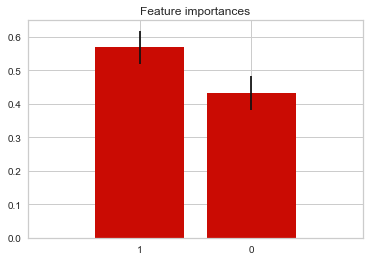

In [24]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
df = pd.DataFrame()
for i, j in zip( x_train_n, forest.feature_importances_ ):
    aux = pd.DataFrame( {'feature': i, 'importance': j}, index=[0] )
    df = pd.concat( [df, aux], axis=0 )
    
print( df.sort_values( 'importance', ascending=False ) )

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train_n.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train_n.shape[1]), indices)
plt.xlim([-1, x_train_n.shape[1]])
plt.show()

# 4.0 Final Model

In [25]:
x_train = train.drop('target', axis=1)
y_train = train['target'].copy()

x_test = test.drop('target', axis=1)
y_validation = test['target'].copy()

In [26]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}




# First create the base model to tune
rf = en.RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [27]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [28]:
#model definition
rf = en.RandomForestClassifier( n_jobs=-1, 
                                random_state=42, 
                                n_estimators= 1600,
                                min_samples_split= 2,
                                min_samples_leaf= 4,
                                max_features= 'sqrt',
                                max_depth= 10,
                                bootstrap= True) 

#model training
rf.fit(x_train, y_train)


# prediction
y_test = rf.predict( x_test )

In [29]:
print('Precision : {}'.format(precision_score(y_validation, y_test)))

print('Recall : {}'.format(recall_score(y_validation, y_test)))

print('F1 Score : {}'.format(f1_score(y_validation, y_test)))

Precision : 0.8650306748466258
Recall : 0.8757763975155279
F1 Score : 0.8703703703703703


In [30]:
classes = [0, 1]

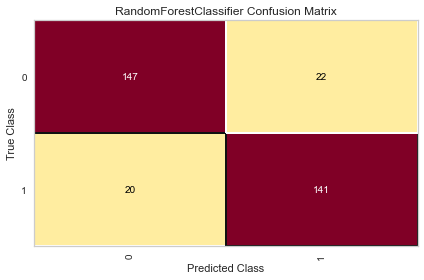

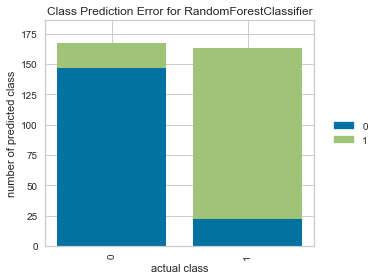

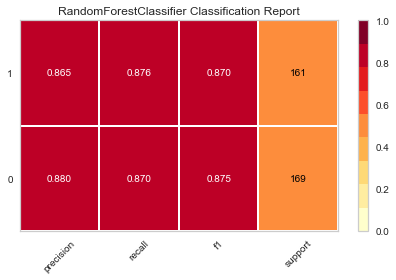

In [32]:
#ax = plt.subplot()
#confusion matrix



class_cm = ConfusionMatrix(
    rf, classes=classes
)



class_cm.fit(x_train, y_train)
class_cm.score(x_test, y_validation)
class_cm.show();


#prediction error
class_prediction_error(
    rf,
    x_train, y_train, x_test, y_validation,
    classes=["0", "1"]
);




#classification report



visualizer = ClassificationReport(rf, classes=classes, support=True)

visualizer.fit(x_train, y_train)              # Fit the visualizer and the model
visualizer.score(x_test, y_validation)        # Evaluate the model on the test data
visualizer.show();                             # Finalize and show the figure


